In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Import Data hasil dari Pre-processing

In [4]:
df = pd.read_csv('./Data/Datapre.csv')

df.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_ExitRates,yj_PageValues,yj_SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration,adm_rasio,info_rasio,product_rasio
275,3,2,2,2,2,Returning_Visitor,0,False,-0.998474,-1.005468,...,-0.169481,-0.532801,-0.33763,0,1,-2.529790,-1.031353,1.007005,0.944540,-0.465440
11868,11,1,1,3,1,Returning_Visitor,0,False,0.074401,-1.005468,...,0.873105,-0.532801,-0.33763,0,1,-0.524420,-0.597377,-13.514108,0.944540,-12.043372
496,3,2,4,2,2,Returning_Visitor,0,False,1.829067,1.328329,...,-0.777637,1.957963,-0.33763,0,1,5.158181,4.344935,0.726233,1.042392,0.703112
8878,11,1,1,4,1,Returning_Visitor,0,False,-0.998474,-1.005468,...,2.011278,-0.532801,-0.33763,0,1,-3.498917,-3.668349,1.007005,0.944540,1.096879
1027,3,2,2,0,2,Returning_Visitor,0,False,-0.998474,-1.005468,...,-0.616316,-0.532801,-0.33763,0,1,-2.392618,-2.576046,1.007005,0.944540,1.236112


In [5]:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [6]:
df.columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue', 'yj_Administrative',
       'yj_Administrative_Duration', 'yj_Informational',
       'yj_Informational_Duration', 'yj_ProductRelated',
       'yj_ProductRelated_Duration', 'yj_BounceRates', 'yj_ExitRates',
       'yj_PageValues', 'yj_SpecialDay', 'visitor_type_Other',
       'visitor_type_Returning_Visitor', 'totalPage_visit', 'total_duration',
       'adm_rasio', 'info_rasio', 'product_rasio'],
      dtype='object')

#### Rename Column

In [7]:
df.columns = df.columns.str.replace('yj_', '')

In [8]:
df.columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'visitor_type_Other',
       'visitor_type_Returning_Visitor', 'totalPage_visit', 'total_duration',
       'adm_rasio', 'info_rasio', 'product_rasio'],
      dtype='object')

### 1. Modeling

### A. Split Data Train & Test 

##### ***Split*** Data menjadi data Train dan Data Test dengan perbandingan rasion 80:20

In [9]:
X = df[[col for col in df.columns if col not in ['VisitorType','Revenue']]]
y = df['Revenue']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
print(len(X_train))
print(len(X_test))

9764
2441


##### Oversampling menggunakan SMOTE dengan rasio 5:3

In [12]:
X_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(0.7,random_state=123).fit_resample(X_train, y_train)

In [13]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train_over_SMOTE).value_counts())

Nilai unik target sebelum oversampling:
 False    10297
True      1908
Name: Revenue, dtype: int64
Nilai unik target sesudah oversampling:
 False    8268
True     5787
Name: Revenue, dtype: int64


### B. Modeling

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [15]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    # score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    # print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    # print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#### Fit Model

##### Decision Tree

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=123) # inisiasi object dengan nama dt
model_dt_fit = model_dt.fit(X_train_over_SMOTE, y_train_over_SMOTE) # fit model decision tree dari data train
# dt.fit(X_train, y_train) # fit model decision tree dari data train



Menggunakan Model Decision Tree karena: <br/> 
- lebih baik digunakan terhadap data kategorikal.
- mudah untuk mencari insight bisnis dari shap value 

#### C. Model Evaluation

#### Confusion Metrix

Text(0, 0.5, 'Actual')

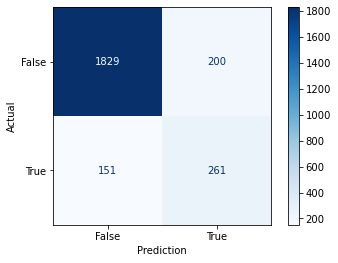

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_dt_fit, X_test, y_test, cmap=plt.cm.Blues)
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [22]:
eval_classification(model_dt_fit)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.57
Recall (Test Set): 0.63
F1-Score (Test Set): 0.60
roc_auc (test-proba): 0.77
roc_auc (train-proba): 1.00


Untuk metric yang dipilih adalah recall. Karena untuk mengurangi hasil False Negatif yang bisa mengakibatkan kehilangan Revenue dari pelanggan. 

#### D. Model Validation

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate

# score = cross_validate(model_dt_fit, X, y, cv=5, scoring='recall', return_train_score=True)
print(cross_val_score(model_dt_fit, X, y, cv=5))
print(cross_val_score(model_dt_fit, X, y, cv=5).mean())
# print('r2 (train): '+ str(score['train_score'].mean()))
# print('r2 (test): '+ str(score['test_score'].mean()))

[0.90741499 0.89881196 0.82466202 0.8082753  0.78861122]
0.8455551003687013


Model memiliki nilai validasi yang lumayan tinggi

#### E. Hyperparameter Tuning

#### Decision Tree dengan hyperparameter

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
# max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
max_depth = [2,4,8,16,32,64] # Maximum number of levels in tree
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=123)
dt_gs = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
model_dt_gs = dt_gs.fit(X_train_over_SMOTE, y_train_over_SMOTE)

# Predict & Evaluation
eval_classification(model_dt_gs)

### 2. Feature Importance

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_over_SMOTE, y_train_over_SMOTE)

DecisionTreeClassifier()

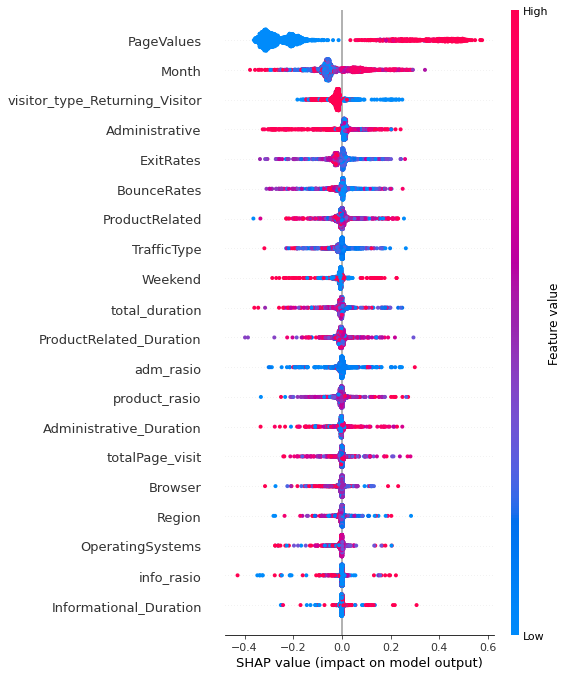

In [29]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

Ketika dilakukan Hyperparamter Tuning yang berfokus pada nilai Recall, maka yang dihasilkan untuk nilai Recall meningkat dari 0.57 menjadi 0.83. Namun untuk nilai lain seperti Akurasi dan Presisi menurun drastis dari sebelum model dilakukan Hyperparameter tuning

In [69]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 263 kB/s eta 0:00:01


#### Menghitung Bias dan Variance

In [22]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        dt, X_train_over_SMOTE, y_train_over_SMOTE, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.149
Average bias: 0.109
Average variance: 0.101


Fit Model RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=123)

model_fit_rfc = rfc.fit(X_train_over_SMOTE, y_train_over_SMOTE) # fit model decision tree dari data train
eval_classification(model_fit_rfc)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.66
Recall (Test Set): 0.69
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


Hyperparameter Tuning Random Forest Classifier

In [24]:
max_features =['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']

hyperparameters = dict(max_features=max_features, criterion=criterion)
gs = GridSearchCV(model_fit_rfc, hyperparameters, cv=5, scoring='recall')
model_fit_gs = gs.fit(X_train_over_SMOTE, y_train_over_SMOTE)
eval_classification(model_fit_gs)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.67
Recall (Test Set): 0.71
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


     |████████████████████████████████| 320 kB 84 kB/s eta 0:00:011
     |████████████████████████████████| 88 kB 224 kB/s eta 0:00:01
     |████████████████████████████████| 81 kB 213 kB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 238 kB/s eta 0:00:01    |▏                               | 30 kB 453 kB/s eta 0:00:16     |███████████████████████████████▌| 7.0 MB 238 kB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Users/mps/opt/anaconda3/bin/python /private/var/folders/gf/wt57jqd101sgkfprvmgnjhbm0000gn/T/pip-standalone-pip-jz6i43mc/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/gf/wt57jqd101sgkfprvmgnjhbm0000gn/T/pip-build-env-0x43xoof/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platf

In [28]:
from pycaret.datasets import get_data
data = df.copy()

In [29]:
data.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative,Administrative_Duration,...,ExitRates,PageValues,SpecialDay,visitor_type_Other,visitor_type_Returning_Visitor,totalPage_visit,total_duration,adm_rasio,info_rasio,product_rasio
11608,11,0,2,1,3,Returning_Visitor,0,0,-0.998474,-1.005468,...,-1.040257,-0.532801,-0.33763,0,1,-2.529790,-2.115791,1.007005,0.94454,0.610964
7722,6,0,1,2,1,Returning_Visitor,0,0,0.074401,-0.204976,...,-1.460001,-0.532801,-0.33763,0,1,-0.105840,-1.216358,-2.755005,0.94454,-1.503397
12030,11,2,2,3,2,Returning_Visitor,0,0,0.074401,0.143823,...,-0.705157,-0.532801,-0.33763,0,1,1.964563,1.656218,1.933065,0.94454,0.831476
5284,5,2,2,3,1,Returning_Visitor,0,0,1.372224,0.833774,...,-0.795347,1.873475,-0.33763,0,1,2.445270,2.055757,0.607607,0.94454,1.075074
7899,11,1,1,1,3,Returning_Visitor,0,0,-0.998474,-1.005468,...,0.432563,-0.532801,-0.33763,0,1,-1.651949,-1.684200,1.007005,0.94454,1.418983


In [30]:
from pycaret.classification import *
s = setup(data, target='Revenue', fold_shuffle=True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:16:54
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Month,Categorical
OperatingSystems,Categorical
Browser,Categorical
Region,Categorical
TrafficType,Categorical
VisitorType,Categorical
Weekend,Categorical
Administrative,Numeric
Administrative_Duration,Numeric
Informational,Numeric


In [27]:
best = compare_models()

NameError: name 'compare_models' is not defined